<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/PDF2TIFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
!pip install pdf2image
!apt-get install poppler-utils

from pdf2image import convert_from_path
import tempfile
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import os
import shutil
import glob

def PDF2TIFF(pdf_path, dst_path, dpi):
    with tempfile.TemporaryDirectory() as path:
        images = convert_from_path(pdf_path, output_folder= path)
    orig = images[0]
    print(f"横: {orig.size[0]} px, 縦: {orig.size[1]} px")
    print(f"解像度： {dpi} dpi")
    print(f"横： {orig.size[0]*25.4/dpi :.2f} mm")
    print(f"縦： {orig.size[1]*25.4/dpi :.2f} mm")
    print("")

    #imageを表示
    arrPIL = np.asarray(orig)
    plt.imshow(arrPIL)
    plt.show()

    orig.save(dst_path, dpi = (dpi, dpi)) # 新しいDPIに書き換えて出力する
    orig.close() # 閉じる

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


#**PDF画像をアップロード**

In [50]:
#画像をアップロード
from google.colab import files
uploaded_file = files.upload()

pdf_name = next(iter(uploaded_file))
print(pdf_name)

Saving 17cm.pdf to 17cm.pdf
Saving 56cm.pdf to 56cm.pdf
17cm.pdf


In [56]:
#@title 解像度設定 { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
dpi = 300 #@param {type:"integer"}

print(f"dpi: {dpi} ")



dpi: 300 


['/content/PDF_25.4cm.pdf', '/content/17cm.pdf', '/content/56cm.pdf', '/content/Figure_sample.pdf']
/content/PDF_25.4cm.pdf
/content/output/PDF_25.4cm.tiff
横: 2000 px, 縦: 1500 px
解像度： 300 dpi
横： 169.33 mm
縦： 127.00 mm



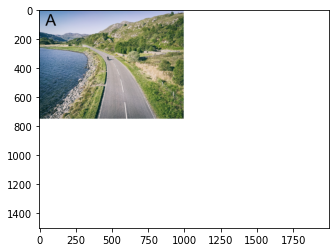

/content/17cm.pdf
/content/output/17cm.tiff
横: 1339 px, 縦: 1003 px
解像度： 300 dpi
横： 113.37 mm
縦： 84.92 mm



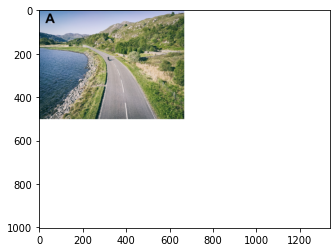

/content/56cm.pdf
/content/output/56cm.tiff
横: 4409 px, 縦: 3309 px
解像度： 300 dpi
横： 373.30 mm
縦： 280.16 mm



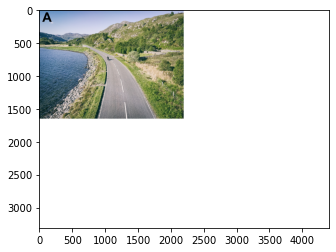

/content/Figure_sample.pdf
/content/output/Figure_sample.tiff
横: 4409 px, 縦: 3309 px
解像度： 300 dpi
横： 373.30 mm
縦： 280.16 mm



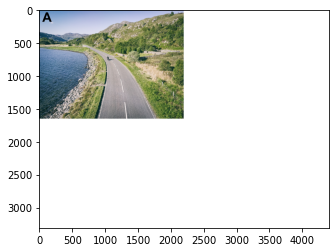

In [68]:
#Contentsフォルダ内のPDFファイルをリスト化する
pdf_list = []
pdf_list = [os.path.join("/content", file) for file in os.listdir("/content") if file.endswith(".pdf")]
print(pdf_list)

#outputフォルダの作成
dst_folder = "/content/output"
if os.path.exists(dst_folder):
    shutil.rmtree(dst_folder)
os.makedirs(dst_folder)

for pdf_path in pdf_list:
    print(pdf_path)
    dst_path = os.path.join(dst_folder, os.path.splitext(os.path.basename(pdf_path))[0]+".tiff")
    print(dst_path)
    PDF2TIFF(pdf_path, dst_path, dpi)

In [79]:
from google.colab import files


for file in glob.glob(dst_folder+"/*"):
    print(file)
    files.download(file) 

/content/output/17cm.tiff


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/output/PDF_25.4cm.tiff


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/output/Figure_sample.tiff


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/output/56cm.tiff


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>